In [1]:
import numpy as np
import pandas as pd
import datetime

from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Activation, BatchNormalization

Using TensorFlow backend.
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib

In [2]:
df_data = pd.read_csv('fwd_data.csv')

print(df_data.shape)

(5000, 14)


In [3]:
df_data.head(10)

,d-12,d0,d12,d24,d36,d48,d60,d72,Load,T_conc,T_base,E_subg,E_base,E_conc
0,3.5530,4.8470,3.5530,2.740190,2.076770,1.594890,1.315030,1.108210,12000,300,300,20,30,500
1,3.0134,4.2338,3.0134,2.360310,1.839380,1.460430,1.218010,1.020100,12000,300,300,20,70,500
2,1.9784,3.0449,1.9784,1.638870,1.379580,1.174870,1.003340,0.833185,12000,300,300,20,350,500
3,1.4079,2.3631,1.4079,1.246110,1.116860,0.990264,0.857186,0.714686,12000,300,300,20,1400,500
4,0.8913,1.7767,0.8913,0.826312,0.762963,0.686354,0.598195,0.502679,12000,300,300,20,14000,500
5,2.7353,3.4013,2.7353,2.224820,1.768450,1.419290,1.172140,0.957926,12000,300,300,20,30,1000
6,2.4309,3.0640,2.4309,1.993870,1.613300,1.322090,1.106340,0.911537,12000,300,300,20,70,1000
7,1.6978,2.2476,1.6978,1.450690,1.250700,1.085750,0.934309,0.778159,12000,300,300,20,350,1000
8,1.2053,1.6507,1.2053,1.096470,0.996473,0.889481,0.773159,0.649443,12000,300,300,20,1400,1000
9,0.7776,1.1785,0.7776,0.725970,0.670631,0.604005,0.528459,0.447075,12000,300,300,20,14000,1000


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
d-12      5000 non-null float64
d0        5000 non-null float64
d12       5000 non-null float64
d24       5000 non-null float64
d36       5000 non-null float64
d48       5000 non-null float64
d60       5000 non-null float64
d72       5000 non-null float64
Load      5000 non-null int64
T_conc    5000 non-null int64
T_base    5000 non-null int64
E_subg    5000 non-null int64
E_base    5000 non-null int64
E_conc    5000 non-null int64
dtypes: float64(8), int64(6)
memory usage: 547.0 KB


In [5]:
point_1 = df_data['d-12'].values.reshape(-1, 1)
point_2 = df_data['d0'].values.reshape(-1, 1)
point_3 = df_data['d12'].values.reshape(-1, 1)
point_4 = df_data['d24'].values.reshape(-1, 1)
point_5 = df_data['d36'].values.reshape(-1, 1)
point_6 = df_data['d48'].values.reshape(-1, 1)
point_7 = df_data['d60'].values.reshape(-1, 1)
point_8 = df_data['d72'].values.reshape(-1, 1)
loading = df_data['Load'].values.reshape(-1, 1)
T_conc = df_data['T_conc'].values.reshape(-1, 1)
T_base = df_data['T_base'].values.reshape(-1, 1)
E_subg = df_data['E_subg'].values.reshape(-1, 1)
E_base = df_data['E_base'].values.reshape(-1, 1)
E_conc = df_data['E_conc'].values.reshape(-1, 1)

print(point_1.shape)
print(point_2.shape)
print(point_3.shape)
print(point_4.shape)
print(point_5.shape)
print(point_6.shape)
print(point_7.shape)
print(point_8.shape)
print(loading.shape)
print(T_conc.shape)
print(T_base.shape)
print(E_subg.shape)
print(E_base.shape)
print(E_conc.shape)

(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)


In [39]:
point_1

array([[3.553   ],
       [3.0134  ],
       [1.9784  ],
       ...,
       [0.541385],
       [0.360221],
       [0.181745]])

In [10]:
data_x = np.concatenate((point_1, point_2, point_3, point_4, point_5, point_6, point_7, point_8,
                      loading, T_conc, T_base, E_subg, E_base), axis=1)
#data_y = np.concatenate((E_AC), axis=1)
data_y = E_conc
print(data_x.shape)
print(data_y.shape)

(5000, 13)
(5000, 1)


In [11]:
data_x

array([[3.55300e+00, 4.84700e+00, 3.55300e+00, ..., 3.00000e+02,
        2.00000e+01, 3.00000e+01],
       [3.01340e+00, 4.23380e+00, 3.01340e+00, ..., 3.00000e+02,
        2.00000e+01, 7.00000e+01],
       [1.97840e+00, 3.04490e+00, 1.97840e+00, ..., 3.00000e+02,
        2.00000e+01, 3.50000e+02],
       ...,
       [5.41385e-01, 7.33968e-01, 5.39338e-01, ..., 7.00000e+02,
        1.00000e+03, 3.50000e+02],
       [3.60221e-01, 5.46615e-01, 3.59004e-01, ..., 7.00000e+02,
        1.00000e+03, 1.40000e+03],
       [1.81745e-01, 3.51297e-01, 1.81044e-01, ..., 7.00000e+02,
        1.00000e+03, 1.40000e+04]])

In [12]:
#x_train = np.array(data[:40000,:])
#y_train = np.array(data[30:40030,3]).reshape(-1, 1)

#x_test = np.array(data[40001:55277-30,:])
#y_test = np.array(data[40031:,3]).reshape(-1, 1)

#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#x_train = np.array(data[:4500,:])
#y_train = np.array(data[:4500,11:]).reshape(-1, 1)

#x_test = np.array(data[4500:,:])
#y_test = np.array(data[4500:,11:]).reshape(-1, 1)

split_value = 5000
x_train = data_x[:split_value, :]
y_train = data_y[:split_value, 0].reshape(-1, 1)

x_test = data_x[split_value:].reshape(-1, 13)
y_test = data_y[split_value:].reshape(-1, 1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# print(x_train.shape, y_train1.shape, y_train2.shape, y_train3.shape,
#        x_test.shape, y_test1.shape, y_test2.shape, y_test3.shape)

(5000, 13) (5000, 1) (0, 13) (0, 1)


In [23]:
h_units = 128
activation_ = 'relu'

def dnn_model():
    model = Sequential()
    
    model.add(Dense(units=256, input_dim=13))#, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Activation(activation_))
    
    model.add(Dense(units=256))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Activation(activation_))
    
    model.add(Dense(units=128))#, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Activation(activation_))
    
    model.add(Dense(units=h_units))
    #model.add(BatchNormalization())
    #model.add(Activation(activation_))

    model.add(Dense(units=1))

    return model

In [24]:
model = dnn_model()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
# training
# hist = model.fit(x_train, y_train, batch_size=256, epochs=500, verbose=True, validation_data=(x_test, y_test), shuffle=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, shuffle=True, validation_data=(x_train, y_train))

Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 263us/step - loss: 70484610.9056 - acc: 0.0000e+00 - val_loss: 70045229.7472 - val_acc: 0.0000e+00
Epoch 2/100
5000/5000 [==============================] - 0s 58us/step - loss: 69561433.5520 - acc: 0.0000e+00 - val_loss: 68019560.4736 - val_acc: 0.0000e+00
Epoch 3/100
5000/5000 [==============================] - 0s 58us/step - loss: 67463260.3520 - acc: 0.0000e+00 - val_loss: 64279751.9616 - val_acc: 0.0000e+00
Epoch 4/100
5000/5000 [==============================] - 0s 59us/step - loss: 63776741.5552 - acc: 0.0000e+00 - val_loss: 59265146.3424 - val_acc: 0.0000e+00
Epoch 5/100
5000/5000 [==============================] - 0s 57us/step - loss: 58517984.4992 - acc: 2.0000e-04 - val_loss: 53120256.3840 - val_acc: 0.0000e+00
Epoch 6/100
5000/5000 [==============================] - 0s 55us/step - loss: 52040478.7968 - acc: 2.0000e-04 - val_loss: 46558074.4576 - val_acc: 0.0000e+00
Epo

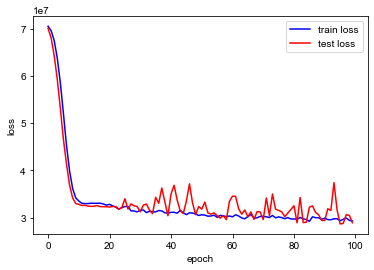

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

In [37]:
y_pred = model.predict(data_x)

No handles with labels found to put in legend.


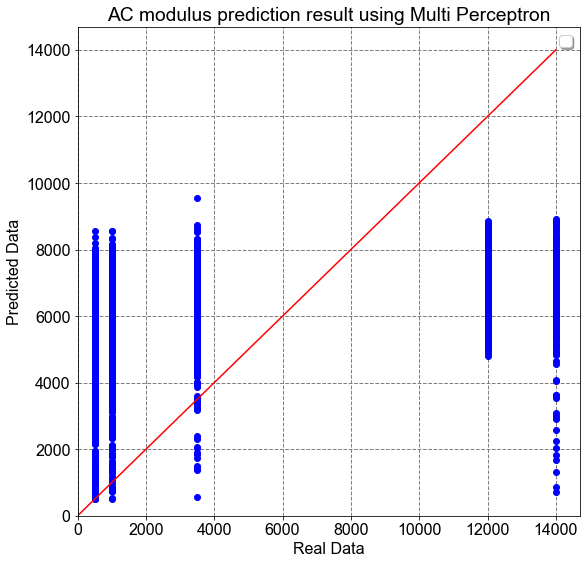

IndexError: index 1 is out of bounds for axis 1 with size 1

In [38]:
# visualization for prediction result
# set figure size
plt.figure(figsize=(9,9))

#pd.DataFrame(y_pred).to_csv('file2.csv', header='none')
# np.savetxt('file.csv', y_pred, delimiter=",")

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data
x = [0, 14000]
y = [0, 14000]

for i in range(3):
    plt.plot(data_y[:,i], y_pred[:,i], 'bo')
    plt.plot(x, y, 'r')

    # set legend position
    plt.legend(shadow=True, loc='upper right')

    # set x-axis & y-axis titles
    plt.title('AC modulus prediction result using Multi Perceptron')
    plt.xlabel('Real Data')
    plt.ylabel('Predicted Data')

    # set axis-limits
    plt.xlim(left = 0) 
    plt.ylim(bottom = 0) 

    # set grid
    plt.grid(color='gray', linestyle='--', linewidth=1)

    # save & display figure
    plt.savefig('prediction_result_{}.png'.format(i))
    plt.show()

In [180]:
#모델 평가하기
trainScore = model.evaluate(x_train, y_train3, verbose=0)
print('Train Score: ', trainScore)
#valScore = model.evaluate(x_val, y_val, verbose=0)
#print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test3, verbose=0)
print('Test Score: ', testScore)

Train Score:  20171.697098958335
Test Score:  20615.290984375


In [181]:
#MAPE

y_test3, y_pred = np.array(y_test3), np.array(y_pred)
mape = np.mean(np.abs((y_test3 - y_pred) / y_test3)) * 100
print('MAPE: ', mape)

MAPE:  8.935132270740327
